<a href="https://colab.research.google.com/github/tanzirmehedi/IoT-Dataset-Analysis/blob/main/DT_on_IoT_Combined_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree (DT) Classifier on IoT Combined Dataset**

**Decision Tree Classifier Building in Scikit-learn**

****Importing libraries****

In [72]:
import timeit
import pydotplus
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

**Upload File**

In [4]:
#uploaded = files.upload()

Saving New_Combined_IoT_dataset.csv to New_Combined_IoT_dataset.csv


**Importing the Dataset**

In [5]:
dataset=pd.read_csv('F:/Shawon/Research Collaberation/Combined Dataset/Dataset without ts date and time columns/New_Combined_IoT_dataset.csv')

**Exploratory Data Analysis**

In [6]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [7]:
print(dataset.shape)

(401119, 18)


In [8]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [9]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Feature Selection**

In [10]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [11]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Decision Tree Model**

In [15]:
#Calculate start time
start = timeit.default_timer()

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [16]:
#Calculate start time
start = timeit.default_timer()

#Predict the response for test dataset
y_pred_dt = dt.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [18]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[69363  4132]
 [12139 34702]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90     73495
           1       0.89      0.74      0.81     46841

    accuracy                           0.86    120336
   macro avg       0.87      0.84      0.85    120336
weighted avg       0.87      0.86      0.86    120336



In [19]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_dt))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_dt))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred_dt))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_dt))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred_dt))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred_dt))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8647869299295307
Precision: 0.8935983931606324
Recall: 0.7408466941354797
F1 Score: 0.810084622118471
Mean Absolute Error: 0.13521307007046934
Cohens kappa: 0.7065252763929195
ROC AUC: 0.8423125912340097
Train Time(s):  2.451369999999997
Test Time(s):  0.07505290000000286


In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

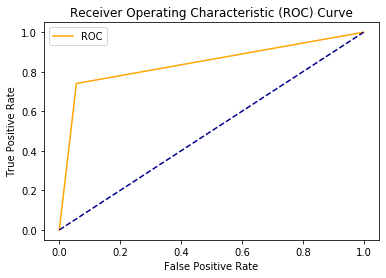

In [28]:
plot_roc_curve(fpr, tpr)

In [30]:
report = classification_report(y_test, y_pred_dt, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-DT-Simple_Result.csv')

**Visualizing Decision Trees**

In [31]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Figure-1.png')
#Image(graph.create_png())

**Optimizing Decision Tree Performance**

In [34]:
#Calculate start time
start = timeit.default_timer()

# Create Decision Tree classifer object
odt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
odt.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [35]:
#Calculate start time
start = timeit.default_timer()

#Predict the response for test dataset
y_pred_odt = odt.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [36]:
print(confusion_matrix(y_test,y_pred_odt))
print(classification_report(y_test,y_pred_odt))

[[71481  2014]
 [28416 18425]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82     73495
           1       0.90      0.39      0.55     46841

    accuracy                           0.75    120336
   macro avg       0.81      0.68      0.69    120336
weighted avg       0.79      0.75      0.72    120336



In [37]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_odt))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_odt))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_odt))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred_odt))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_odt))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred_odt))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred_odt))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.7471247174577849
Precision: 0.9014628895738539
Recall: 0.39335197796801946
F1 Score: 0.5477110582639714
Mean Absolute Error: 0.25287528254221514
Cohens kappa: 0.40760976918321723
ROC AUC: 0.6829743766294278
Train Time(s):  0.4418849000001046
Test Time(s):  0.032485399999814035


In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_odt)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

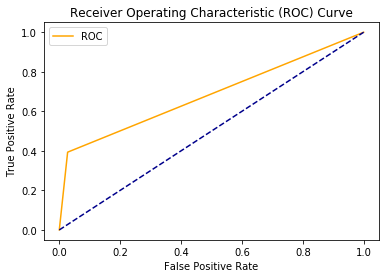

In [39]:
plot_roc_curve(fpr, tpr)

In [40]:
report = classification_report(y_test, y_pred_dt, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-DT-Optimizing_Result.csv')

**Visualizing Decision Trees**

In [73]:
dot_data = StringIO()
export_graphviz(odt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Figure-2.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

**Gradient Boosted Decision Trees**

In [42]:
#Calculate start time
start = timeit.default_timer()

# Create gradient boost Decision Tree classifer object
gbdt = GradientBoostingClassifier()

# Train Gradient boost Decision Tree Classifer
gbdt.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [43]:
#Calculate start time
start = timeit.default_timer()

#Predict the response for test dataset
y_pred_gbdt = gbdt.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

In [44]:
print(confusion_matrix(y_test,y_pred_gbdt))
print(classification_report(y_test,y_pred_gbdt))

[[71160  2335]
 [21232 25609]]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86     73495
           1       0.92      0.55      0.68     46841

    accuracy                           0.80    120336
   macro avg       0.84      0.76      0.77    120336
weighted avg       0.83      0.80      0.79    120336



In [45]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbdt))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_gbdt))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_gbdt))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred_gbdt))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_gbdt))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred_gbdt))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred_gbdt))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8041566945884856
Precision: 0.9164400229029488
Recall: 0.546721888943447
F1 Score: 0.6848699605535871
Mean Absolute Error: 0.19584330541151443
Cohens kappa: 0.5555953443181307
ROC AUC: 0.7574755100884322
Train Time(s):  29.047740199999907
Test Time(s):  0.19865039999990586


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbdt)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

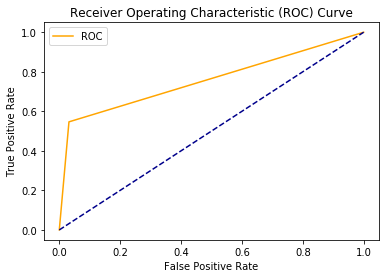

In [47]:
plot_roc_curve(fpr, tpr)

In [48]:
report = classification_report(y_test, y_pred_dt, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-DT-Gradient_Boosted_Result.csv')

**Gradient Boosted Decision Trees with Learning Rate**

**Building the Model**

In [49]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbdtl = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gbdtl.fit(X_train, y_train)
    y_pred_gbdtl = gbdtl.predict(X_test)
    print("Learning rate: ", learning_rate)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbdtl))
    print("Precision:",metrics.precision_score(y_test, y_pred_gbdtl))
    print("Recall:",metrics.recall_score(y_test, y_pred_gbdtl))
    print("F1 Score:",metrics.f1_score(y_test, y_pred_gbdtl))
    print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_gbdtl))
    print('Train Time(s): ',train_time) 
    print('Test Time(s): ',test_time)
    print("\n")

Learning rate:  0.05
Accuracy: 0.7072779550591677
Precision: 1.0
Recall: 0.24798787387118124
F1 Score: 0.39742032605162775
Mean Absolute Error: 0.2927220449408323
Train Time(s):  29.047740199999907
Test Time(s):  0.19865039999990586


Learning rate:  0.1
Accuracy: 0.7505733944954128
Precision: 0.920944661262884
Recall: 0.39294635041950426
F1 Score: 0.5508551932602092
Mean Absolute Error: 0.24942660550458715
Train Time(s):  29.047740199999907
Test Time(s):  0.19865039999990586


Learning rate:  0.25
Accuracy: 0.7585926073660417
Precision: 0.9040654099477629
Recall: 0.42490553147883264
F1 Score: 0.5781050307888927
Mean Absolute Error: 0.24140739263395825
Train Time(s):  29.047740199999907
Test Time(s):  0.19865039999990586


Learning rate:  0.5
Accuracy: 0.7972593405132297
Precision: 0.9172367638310529
Recall: 0.5266753485194594
F1 Score: 0.6691348983549642
Mean Absolute Error: 0.20274065948677036
Train Time(s):  29.047740199999907
Test Time(s):  0.19865039999990586


Learning rate:  0.7

**Ada Boost Classifier in Decision Trees**

**Building the Model**

In [50]:
#Calculate start time
start = timeit.default_timer()

#Create Decision tree Model 
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)

# Create Ada boost Decision Tree classifer object
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)

# Train Ada boost Decision Tree Classifer
AdaBoost.fit(X_train, y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [51]:
#Calculate start time
start = timeit.default_timer()

#Predict the response for test dataset
y_pred_AdaBoost = AdaBoost.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [52]:
print(confusion_matrix(y_test,y_pred_AdaBoost))
print(classification_report(y_test,y_pred_AdaBoost))

[[70616  2879]
 [20636 26205]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     73495
           1       0.90      0.56      0.69     46841

    accuracy                           0.80    120336
   macro avg       0.84      0.76      0.77    120336
weighted avg       0.82      0.80      0.79    120336



In [53]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_AdaBoost))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_AdaBoost))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_AdaBoost))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred_AdaBoost))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred_AdaBoost))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred_AdaBoost))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred_AdaBoost))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.804588817976333
Precision: 0.9010108650804566
Recall: 0.5594457846758182
F1 Score: 0.6902864669081329
Mean Absolute Error: 0.19541118202366706
Cohens kappa: 0.5586772808397859
ROC AUC: 0.7601365259184248
Train Time(s):  103.39038140000002
Test Time(s):  11.03449969999997


In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_AdaBoost)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

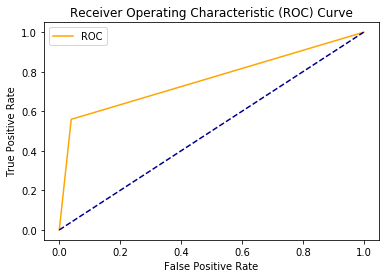

In [55]:
plot_roc_curve(fpr, tpr)

In [56]:
report = classification_report(y_test, y_pred_dt, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('TML-DT-Ada_Boost_Result.csv')